In [33]:
import pandas as pd
df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv', low_memory=False)

In [34]:
df.shape
pd.set_option('display.max_columns', None)

In [35]:
# Display summary statistics of dataset
df.describe()
print(df.head())

    item_id          status created_at  \
0  211131.0        complete   7/1/2016   
1  211133.0        canceled   7/1/2016   
2  211134.0        canceled   7/1/2016   
3  211135.0        complete   7/1/2016   
4  211136.0  order_refunded   7/1/2016   

                                                 sku   price  qty_ordered  \
0                                  kreations_YI 06-L  1950.0          1.0   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0          1.0   
2                                 Ego_UP0017-999-MR0  2450.0          1.0   
3                                     kcc_krone deal   360.0          1.0   
4                                        BK7010400AG   555.0          2.0   

   grand_total increment_id    category_name_1 sales_commission_code  \
0       1950.0    100147443    Women's Fashion                    \N   
1        240.0    100147444  Beauty & Grooming                    \N   
2       2450.0    100147445    Women's Fashion                    \N

In [36]:
# Display information about the DataFrame, including the number of non-null entries, data types and size.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [37]:
# Show all column names
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [38]:
# Renaming the columns for better clarity and consistency in the dataset
df.rename(columns = {
    'status': 'order_status',
    'created_at': 'order_date',
    'sku': 'product_id',
    'qty_ordered' : 'order_quantity',
    'category_name_1': 'category',
    'Working Date': 'working_date',
    'BI Status': 'BI_status',
    ' MV ': 'market_value', 
    'Year': 'year',
    'Month': 'month',
    'Customer Since': 'customer_since',
    'M-Y': 'month_year',
    'FY': 'financial_year',
    'Customer ID': 'customer_id'
}, inplace=True)
print(df.columns)

Index(['item_id', 'order_status', 'order_date', 'product_id', 'price',
       'order_quantity', 'grand_total', 'increment_id', 'category',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'working_date', 'BI_status', 'market_value', 'year', 'month',
       'customer_since', 'month_year', 'financial_year', 'customer_id',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')


In [39]:
# Clean the dataset
df_cleaned = df.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])
num_cols = ['price', 'order_quantity', 'grand_total', 'discount_amount', 'market_value']

In [40]:
# Fill missing values for numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df[numeric_cols])


               item_id        price  order_quantity  grand_total  \
0        211131.000000  1950.000000        1.000000  1950.000000   
1        211133.000000   240.000000        1.000000   240.000000   
2        211134.000000  2450.000000        1.000000  2450.000000   
3        211135.000000   360.000000        1.000000    60.000000   
4        211136.000000   555.000000        2.000000  1110.000000   
...                ...          ...             ...          ...   
1048570  565667.074218  6348.747531        1.296388  8530.618571   
1048571  565667.074218  6348.747531        1.296388  8530.618571   
1048572  565667.074218  6348.747531        1.296388  8530.618571   
1048573  565667.074218  6348.747531        1.296388  8530.618571   
1048574  565667.074218  6348.747531        1.296388  8530.618571   

         discount_amount         year     month   customer_id  Unnamed: 21  \
0               0.000000  2016.000000  7.000000      1.000000          NaN   
1               0.000000  2

In [41]:
# Let's see the last completely empty columns
df.iloc[:, -5:]

,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN


In [42]:
# Now lets check the missing values
df.isnull().sum().sort_values(ascending=False)

Unnamed: 25              1048575
Unnamed: 24              1048575
Unnamed: 23              1048575
Unnamed: 22              1048575
Unnamed: 21              1048575
sales_commission_code     601229
category                  464215
product_id                464071
order_status              464066
customer_since            464062
financial_year            464051
month_year                464051
market_value              464051
BI_status                 464051
working_date              464051
payment_method            464051
increment_id              464051
order_date                464051
year                           0
month                          0
discount_amount                0
customer_id                    0
grand_total                    0
order_quantity                 0
price                          0
item_id                        0
dtype: int64

In [43]:
# I am removing "sales_commission_code" column because it has 601229 missing values and is not so important.
df.drop(columns='sales_commission_code', inplace=True)

In [44]:
# Removing empty rows based on the "sku" and "Customer ID" columns. The "sku" column cannot be filled because each item has a unique SKU number.
df.dropna(subset=['product_id', 'customer_id'], inplace=True)

In [45]:

# Filling missing values in 'category', 'customer_since', and 'order_status' columns with their most frequent values (mode).
df[['category', 'customer_since', 'order_status']] = df[['category', 'customer_since', 'order_status']].fillna(df[['category', 'customer_since', 'order_status']].mode().iloc[0])

In [46]:
df.isnull().sum()

item_id                 0
order_status            0
order_date              0
product_id              0
price                   0
order_quantity          0
grand_total             0
increment_id            0
category                0
discount_amount         0
payment_method          0
working_date            0
BI_status               0
market_value            0
year                    0
month                   0
customer_since          0
month_year              0
financial_year          0
customer_id             0
Unnamed: 21        584504
Unnamed: 22        584504
Unnamed: 23        584504
Unnamed: 24        584504
Unnamed: 25        584504
dtype: int64

In [47]:
# Finding Top 10 ordered categories in Pakistan
top_cat = df.groupby('category')['order_quantity'].sum().sort_values(ascending=False).reset_index().head(10)       
top_cat   

,category,order_quantity
0,Mobiles & Tablets,134117.0
1,Men's Fashion,101424.0
2,Others,84916.0
3,Superstore,82542.0
4,Women's Fashion,64216.0
5,Appliances,58203.0
6,Beauty & Grooming,53790.0
7,Soghaat,47418.0
8,Home & Living,30065.0
9,Entertainment,27416.0


In [48]:
# Lets See all unique categories
df['category'].unique()

array(["Women's Fashion", 'Beauty & Grooming', 'Soghaat',
       'Mobiles & Tablets', 'Appliances', 'Home & Living',
       "Men's Fashion", 'Kids & Baby', '\\N', 'Others', 'Entertainment',
       'Computing', 'Superstore', 'Health & Sports', 'Books',
       'School & Education'], dtype=object)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8232\1038608373.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(data = top_cat, x= 'category', y = 'order_quantity', palette = 'viridis')


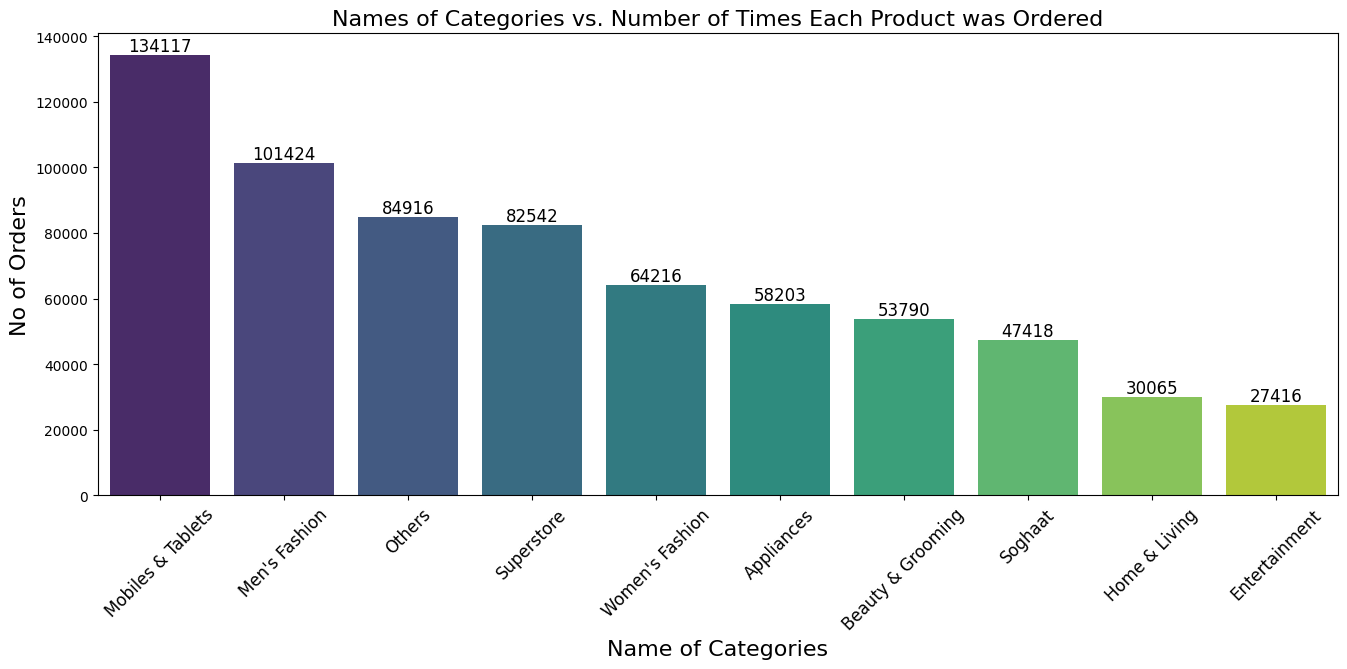

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the Top 10 ordered categories in Pakistan
plt.figure(figsize=(16,6))
plt.xticks(rotation=45, fontsize=12)
fig = sns.barplot(data = top_cat, x= 'category', y = 'order_quantity', palette = 'viridis')
plt.xlabel('Name of Categories', size=16)
plt.ylabel('No of Orders', size=16)
plt.title('Names of Categories vs. Number of Times Each Product was Ordered', size=16)

for bars in fig.containers:
    fig.bar_label(bars, fontsize=12)
    
plt.show()

In [50]:
# Check the unique values in payment_method columns
df['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

In [51]:
# Convert the 'year' column to integers using .loc
df.loc[:, 'year'] = df['year'].astype(int)

# Check the year with the highest number of orders
year_sales = df.groupby(['year'])['order_quantity'].count().sort_values(ascending=False).reset_index()
year_sales

,year,order_quantity
0,2017.0,290908
1,2018.0,159695
2,2016.0,133901


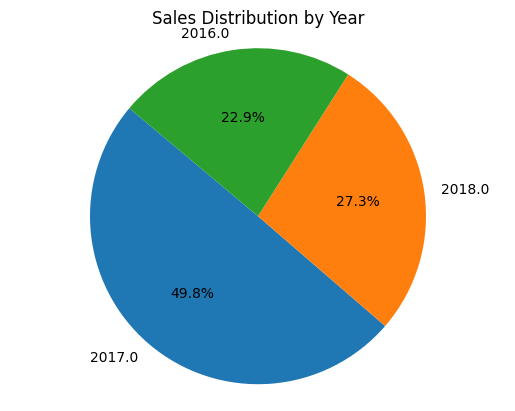

In [52]:
#Plot a Pie Chart to Display Yearly Sales Trends
plt.pie(year_sales['order_quantity'], labels=year_sales['year'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Year')
plt.axis('equal')
plt.show()

In [53]:
# Check the data type of 'order_date' column
print(df['order_date'].dtype)
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['date'] = df['order_date'].dt.day
day_wise_sales = df.groupby('date')['order_quantity'].sum().sort_values(ascending=False).reset_index().head(10)
print(day_wise_sales)


object
   date  order_quantity
0    27         45193.0
1    19         41916.0
2    25         39051.0
3    28         38926.0
4    24         37762.0
5    15         37191.0
6    23         33183.0
7    17         31827.0
8    26         31827.0
9    22         27640.0


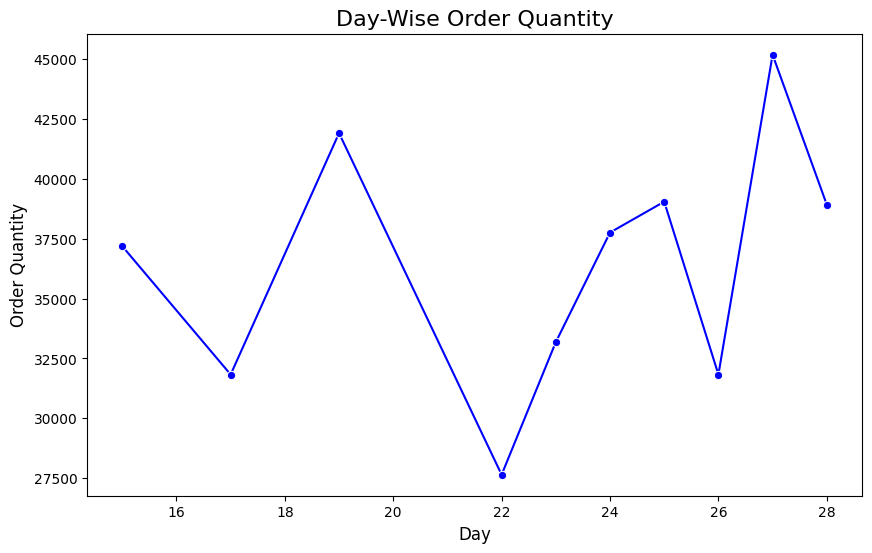

In [54]:
# Plot to visualize the day wise oder quantity in months
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='order_quantity', data=day_wise_sales, marker='o', color='blue')

# Add labels and title
plt.title('Day-Wise Order Quantity', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Order Quantity', fontsize=12)

# Show the plot
plt.show()

In [55]:
# Group by customer_id and count the number of items ordered per customer.
customer_orders = df.groupby('customer_id')['item_id'].count().value_counts(ascending=False).reset_index(name = 'customers')
customer_orders.head(10)

,item_id,customers
0,1,50396
1,2,20851
2,3,10694
3,4,8930
4,5,4391
5,6,3340
6,7,2365
7,8,2190
8,9,1483
9,10,1199


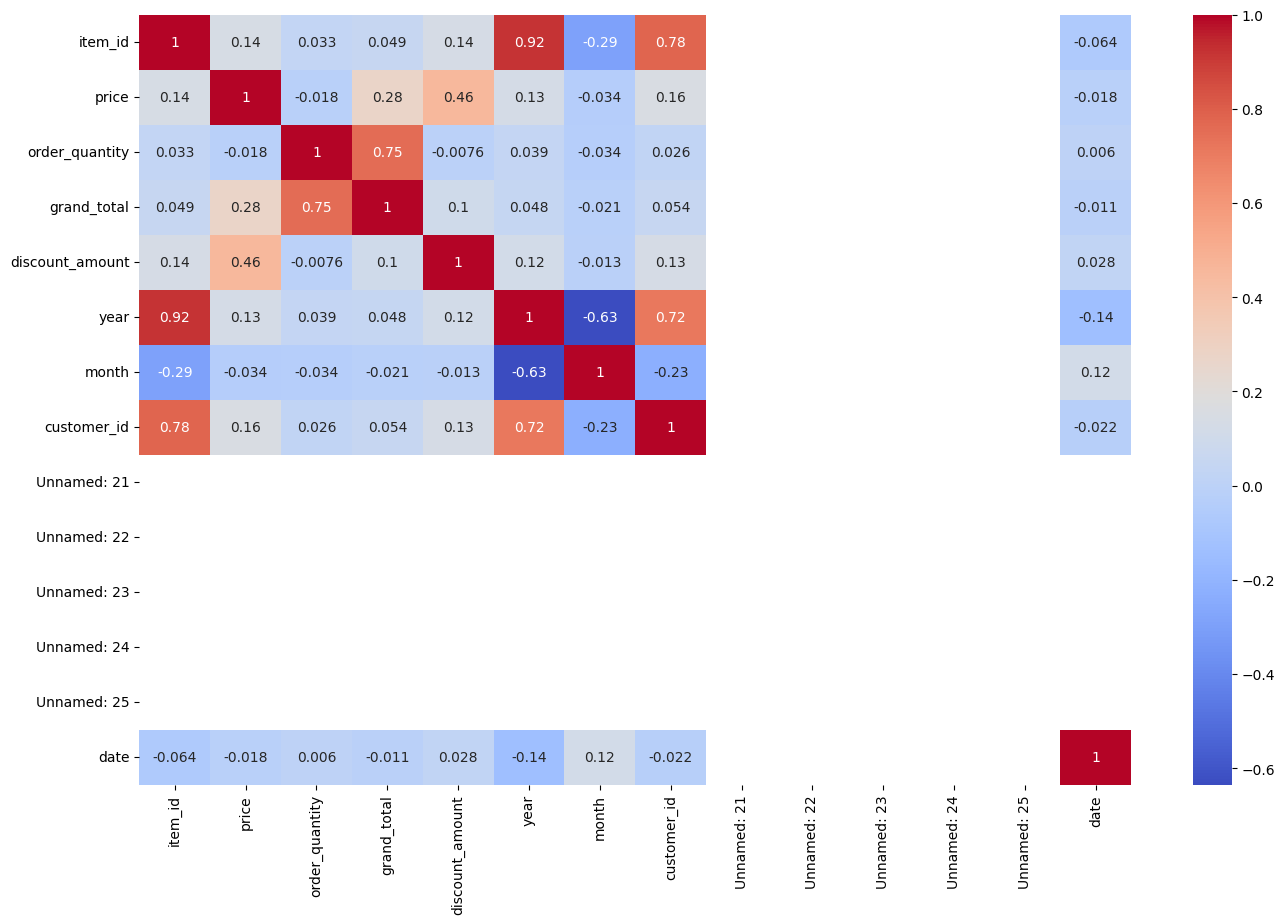

In [56]:
# Correlation between features
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(numeric_only = True),cmap = "coolwarm", annot = True)
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Strip whitespace and replace commas
df['market_value'] = df['market_value'].str.strip().str.replace(',', '')

# Convert to float, coercing non-numeric values to NaN
df['market_value'] = pd.to_numeric(df['market_value'], errors='coerce')

# Option 1: Drop rows with NaN values in 'market_value'
df = df.dropna(subset=['market_value'])

# Option 2: Fill NaN values with a default value (e.g., 0)
# df['market_value'] = df['market_value'].fillna(0)
print(df['market_value'].dtype)
print(df['market_value'].head())



float64
0    1950.0
1     240.0
2    2450.0
3     360.0
4    1110.0
Name: market_value, dtype: float64


In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize numerical columns
numerical_cols = ['order_quantity', 'market_value']
scaler_standard = StandardScaler()
df[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])

# Normalize data for clustering using Min-Max scaling
scaler_minmax = MinMaxScaler()
df[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])
print(df.head())


    item_id    order_status order_date  \
0  211131.0        complete 2016-07-01   
1  211133.0        canceled 2016-07-01   
2  211134.0        canceled 2016-07-01   
3  211135.0        complete 2016-07-01   
4  211136.0  order_refunded 2016-07-01   

                                          product_id   price  order_quantity  \
0                                  kreations_YI 06-L  1950.0        0.000000   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0        0.000000   
2                                 Ego_UP0017-999-MR0  2450.0        0.000000   
3                                     kcc_krone deal   360.0        0.000000   
4                                        BK7010400AG   555.0        0.001001   

   grand_total increment_id           category  discount_amount  \
0       1950.0    100147443    Women's Fashion              0.0   
1        240.0    100147444  Beauty & Grooming              0.0   
2       2450.0    100147445    Women's Fashion              0.0  

In [59]:

# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['category', 'order_status', 'BI_status']
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [60]:
# Extracting useful date features
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_weekday'] = df['order_date'].dt.day_name()
df['order_month'] = df['order_date'].dt.month
df['order_year'] = df['order_date'].dt.year

# Customer lifetime value approximation
df['customer_lifetime'] = df['year'] - pd.to_datetime(df['customer_since']).dt.year
print(df['customer_lifetime'])


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
584519    0.0
584520    0.0
584521    0.0
584522    0.0
584523    0.0
Name: customer_lifetime, Length: 582289, dtype: float64


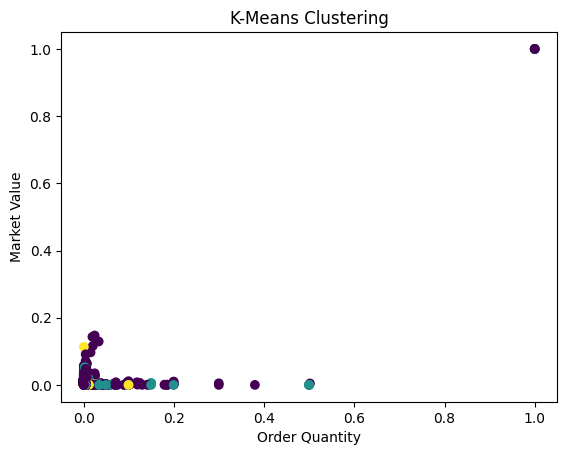

Cluster Centers: [[2.73832882e-04 8.22849303e-04 9.99977878e-13]
 [3.45322826e-04 7.48347530e-04 1.00000000e+00]
 [4.53644194e-04 7.54658577e-04 2.00000000e+00]]


In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the numerical features for clustering
X = df[['order_quantity', 'market_value', 'customer_lifetime']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(df['order_quantity'], df['market_value'], c=df['cluster'], cmap='viridis')
plt.xlabel('Order Quantity')
plt.ylabel('Market Value')
plt.title('K-Means Clustering')
plt.show()

# Check the cluster centers
print("Cluster Centers:", kmeans.cluster_centers_)



In [63]:
from sklearn.ensemble import IsolationForest

# Select the numerical columns for anomaly detection
X = df[['order_quantity', 'market_value']]

# Fit the Isolation Forest model
iso_forest = IsolationForest(random_state=42)
df['anomaly'] = iso_forest.fit_predict(X)

# Anomalies are labeled as -1, normal data points are labeled as 1
anomalies = df[df['anomaly'] == -1]

print("Anomalies Detected:\n", anomalies)



Anomalies Detected:
          item_id  order_status order_date            product_id     price  \
8       211140.0             1 2016-07-01  Apple iPhone 6S 64GB   96499.0   
9       211141.0             1 2016-07-01  Apple iPhone 6S 64GB   96499.0   
28      211163.0             4 2016-07-01         SKMT_Medicine     100.0   
29      211164.0             1 2016-07-01      sputnik_701/5-11    1500.0   
60      211202.0             8 2016-07-01       Eco Star_40U557   30417.0   
...          ...           ...        ...                   ...       ...   
584516  905199.0            11 2018-08-28   MATINF59BAB39FDBEF1    6760.0   
584520  905205.0            13 2018-08-28   MATHUA5AF70A7D1E50A   35599.0   
584521  905206.0            13 2018-08-28   MATSAM5B6D7208C6D30  129999.0   
584522  905207.0            13 2018-08-28   MATSAM5B1509B4696EA   87300.0   
584523  905208.0            13 2018-08-28   MATSAM5B10F91A9B6AB  108640.0   

        order_quantity  grand_total increment_id  cate

Customer Segmentation Results:
    customer_id  customer_segment
0          1.0                 0
1          2.0                 0
2          3.0                 0
3          4.0                 0
4          5.0                 0


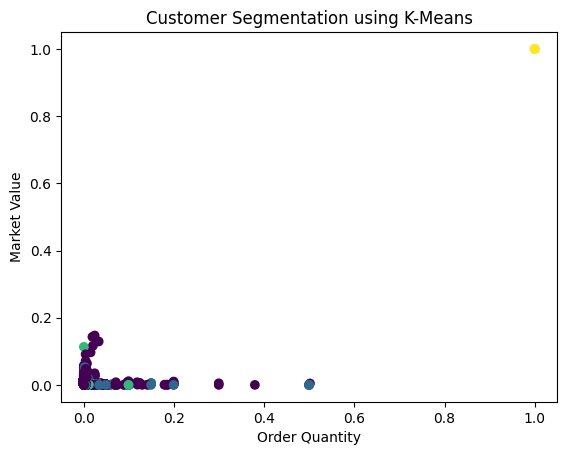

In [64]:
from sklearn.cluster import KMeans

# Select relevant features for customer segmentation
X = df[['order_quantity', 'market_value', 'customer_lifetime']]

# Apply K-Means clustering for customer segmentation
kmeans = KMeans(n_clusters=4, random_state=42)
df['customer_segment'] = kmeans.fit_predict(X)

# Display the clusters
print("Customer Segmentation Results:\n", df[['customer_id', 'customer_segment']].head())

# Plot customer segments
plt.scatter(df['order_quantity'], df['market_value'], c=df['customer_segment'], cmap='viridis')
plt.xlabel('Order Quantity')
plt.ylabel('Market Value')
plt.title('Customer Segmentation using K-Means')
plt.show()


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


selected_features = ['order_quantity', 'market_value', 'customer_lifetime'] 
target_col = 'order_status'  

if all(col in df.columns for col in selected_features) and target_col in df.columns:
    # Split the data
    X = df[selected_features]
    y = df[target_col]
else:
    raise ValueError("Selected features or target column are not in the DataFrame.")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluation
y_pred = logistic_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.p

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.05      0.09     60525
           2       0.00      0.00      0.00       153
           3       0.00      0.00      0.00       857
           4       0.41      0.99      0.57     69794
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00     17504
           9       0.00      0.00      0.00       347
          10       0.00      0.00      0.00        22
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00     23124
          15       0.00      0.00      0.00      2326

    accuracy                           0.41    174687
   macro avg       0.07      0.07      0.04    174687
we

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


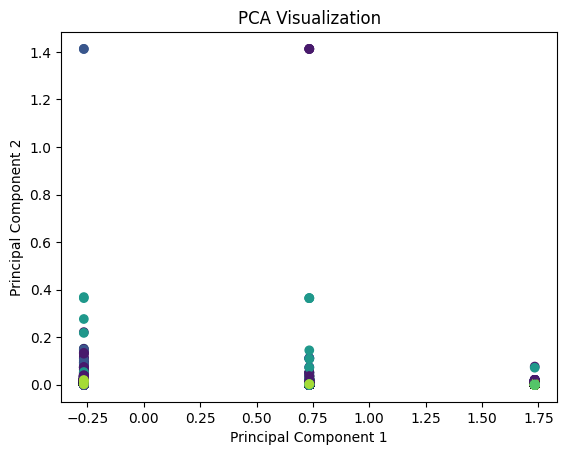

In [66]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Random Forest Accuracy: 50.92%


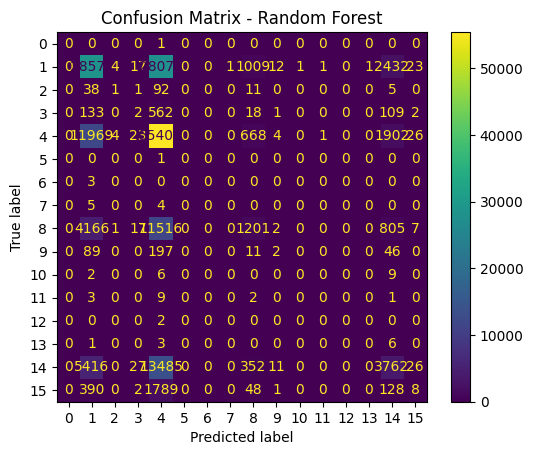

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix and plot
all_classes = sorted(y.unique())  # Ensure all unique classes are included
cm = confusion_matrix(y_test, y_pred_rf, labels=all_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_classes)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix - Random Forest")
plt.show()



In [68]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
df['hdbscan_cluster'] = clusterer.fit_predict(X)

print("HDBSCAN Clustering Results:")
print(df['hdbscan_cluster'].value_counts())




HDBSCAN Clustering Results:
hdbscan_cluster
-1       7933
 2798    7465
 3906    6367
 4400    5627
 3733    5138
         ... 
 770        5
 6032       5
 462        5
 3872       5
 514        5
Name: count, Length: 9581, dtype: int64


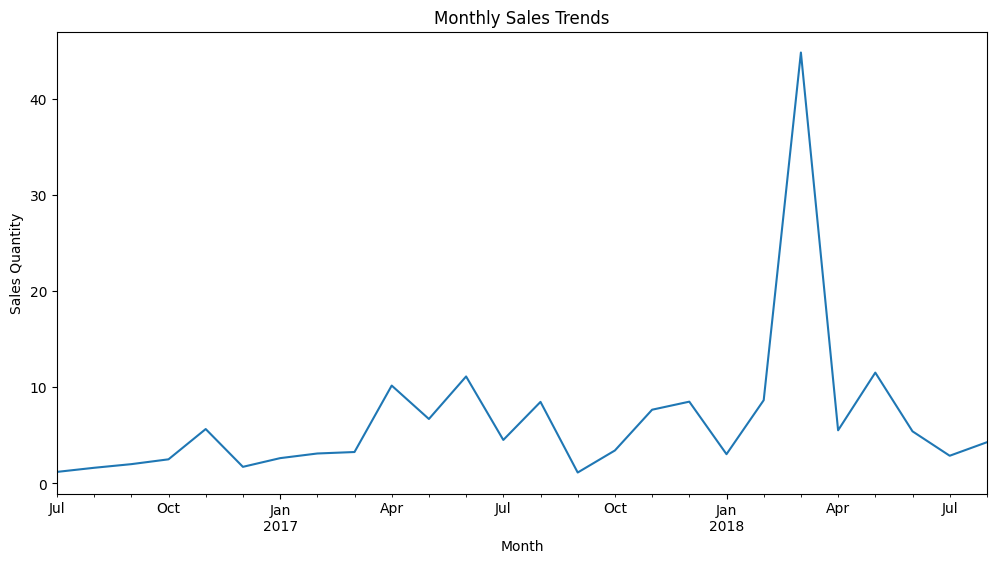

In [69]:
df['order_month'] = pd.to_datetime(df['order_date']).dt.to_period('M')
monthly_sales = df.groupby('order_month')['order_quantity'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Sales Quantity")
plt.show()



The filtered data is used for the kernel density plots because the high skewness in the original data makes it challenging to visualize the distribution effectively. By visualizing the filtered data, we can estimate the underlying distribution
While the actual distribution may differ from what is shown here, this approach provides a clearer idea of its overall pattern.

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

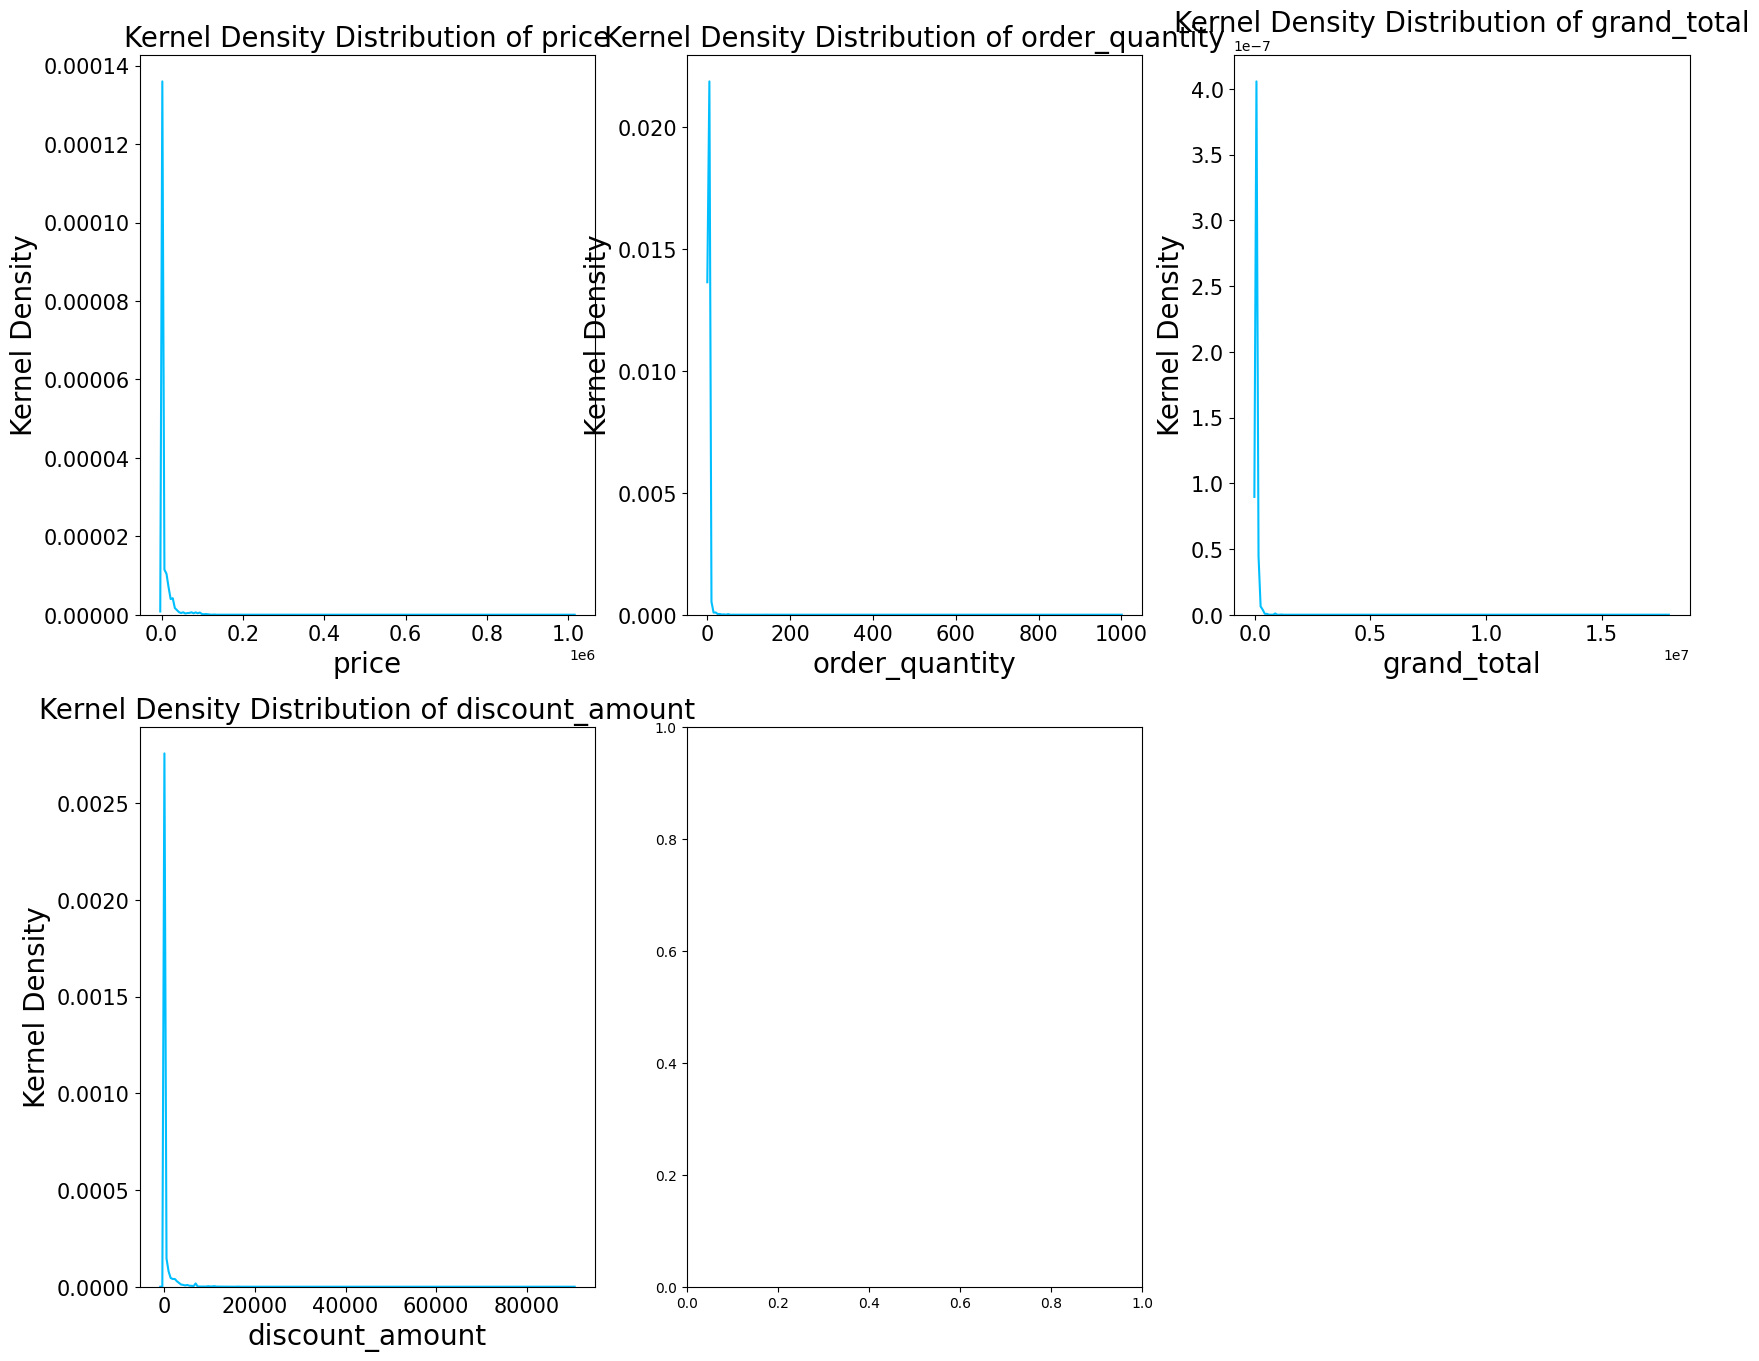

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Kernel Density Distribution
plt.figure(figsize=(20, 16))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(data=df_cleaned, x=col, color="deepskyblue")
    plt.title(f"Kernel Density Distribution of {col}", fontsize=20)
    plt.xlabel(f"{col}", fontsize=20)
    plt.ylabel("Kernel Density", fontsize=20)
    plt.tick_params(axis="both", labelsize=15)

plt.tight_layout(w_pad=2, h_pad=4)
plt.show()



Similar to the order status analysis, the frequency graph for payment methods indicates that most deliveries are paid using cash on delivery (COD).
Although EasyPaisa is less frequently used compared to COD, the graph suggests that larger payments are often made via EasyPaisa.

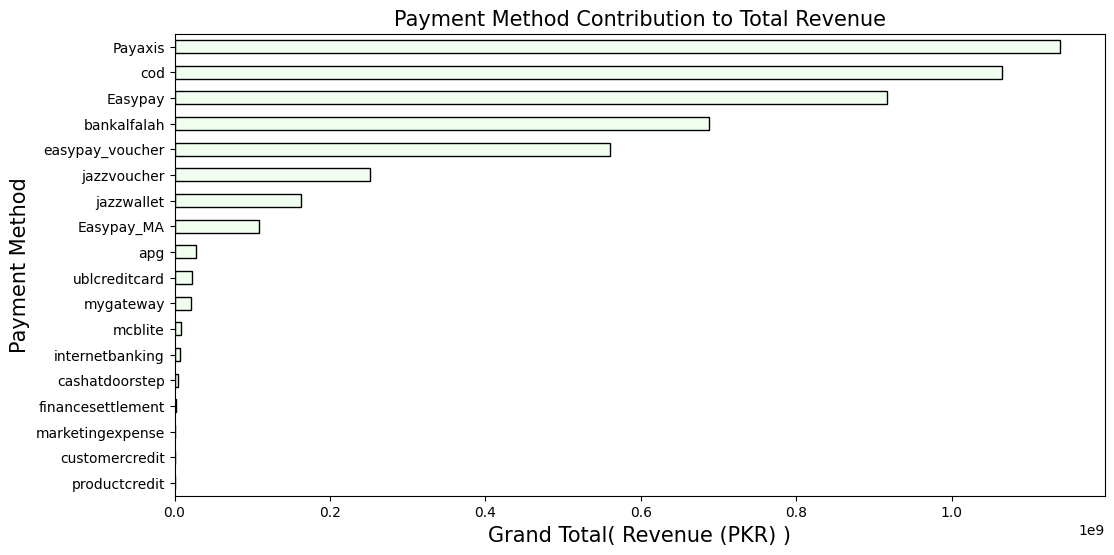

In [71]:
plt.figure(figsize = (12,6))
best_payment_method = df.groupby("payment_method")["grand_total"].sum().sort_values()
best_payment_method.plot(kind = "barh",edgecolor = "black" , color = "honeydew")
plt.title("Payment Method Contribution to Total Revenue",fontsize = 15)
plt.ylabel("Payment Method",fontsize = 15)
plt.xlabel("Grand Total( Revenue (PKR) )",fontsize = 15)
plt.show()